In [1]:
library("data.table")
library("qtl")

In [53]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir = "./new_subsets",
                    genfile="20190827_rqtl_f2_geno.csv",
                    phefile = "20190827_rqtl_f2_pheno.csv" )

 --Read the following data:
	 914  individuals
	 1013  markers
	 7  phenotypes
 --Cross type: f2 


    F2 intercross

    No. individuals:    914 

    No. phenotypes:     7 
    Percent phenotyped: 100 94.2 94.2 100 100 100 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 

    Total markers:      1013 
    No. markers:        198 150 111 92 82 60 37 37 31 25 21 21 20 20 17 14 13 12 
                        11 11 8 8 7 7 
    Percent genotyped:  94.4 
    Genotypes (%):      AA:24.9  AB:48.8  BB:26.3  not BB:0.0  not AA:0.0 

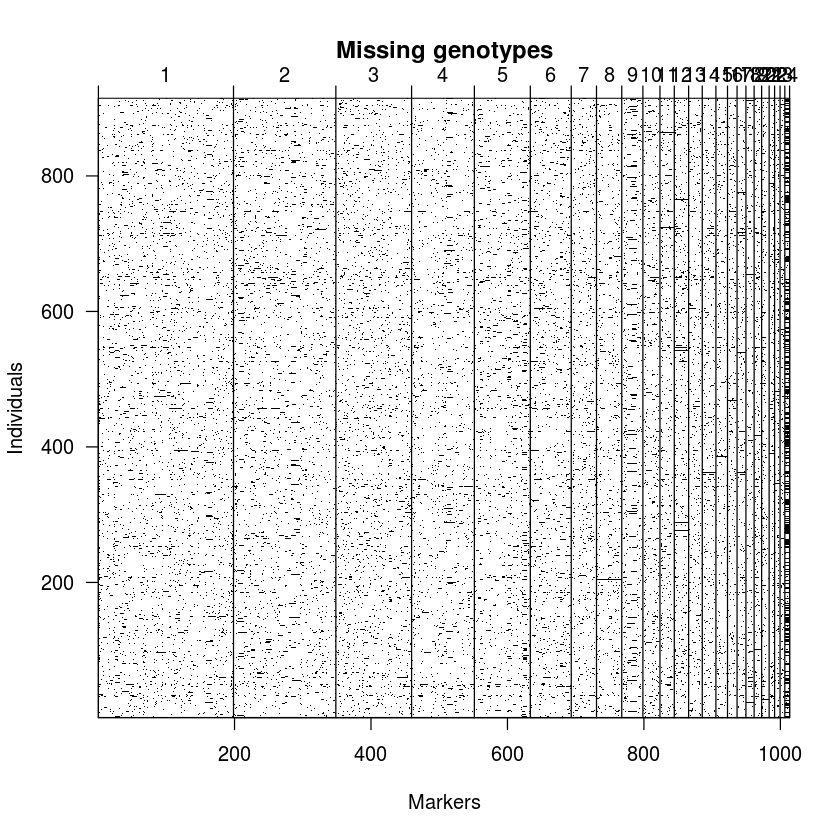

In [55]:
plotMissing(datf2)

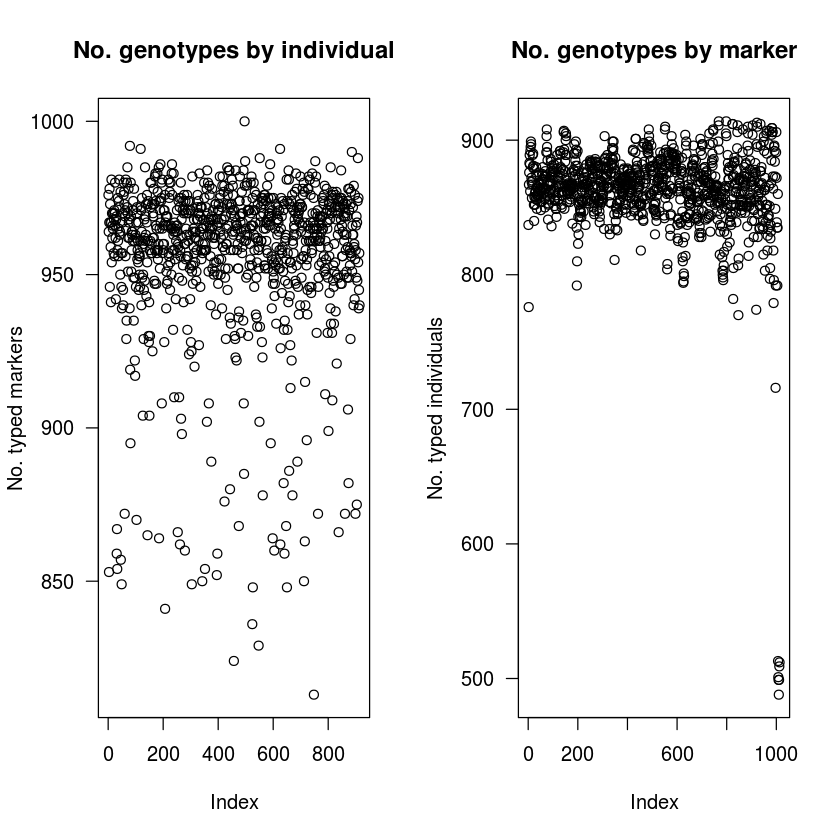

In [56]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [57]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 450]) # less than 50% of all markers


In [58]:
todrop

character(0)

In [59]:
datf2.1 <- drop.markers(datf2, todrop)

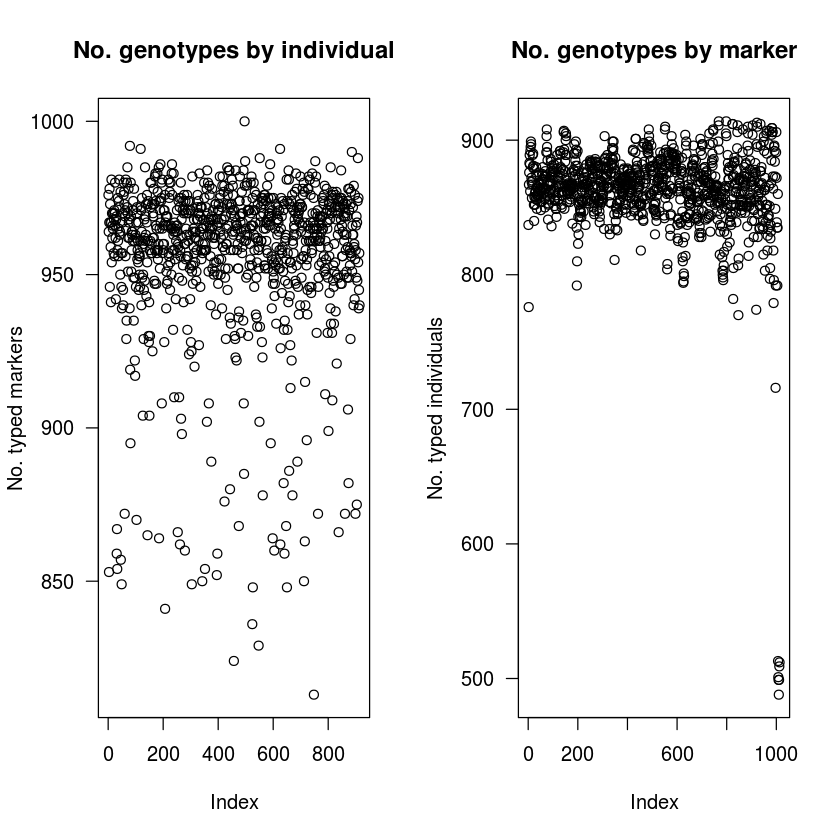

In [60]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [61]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>100)) # removing all individuals that have less than 10% of all markers


In [62]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 914

[1] 914

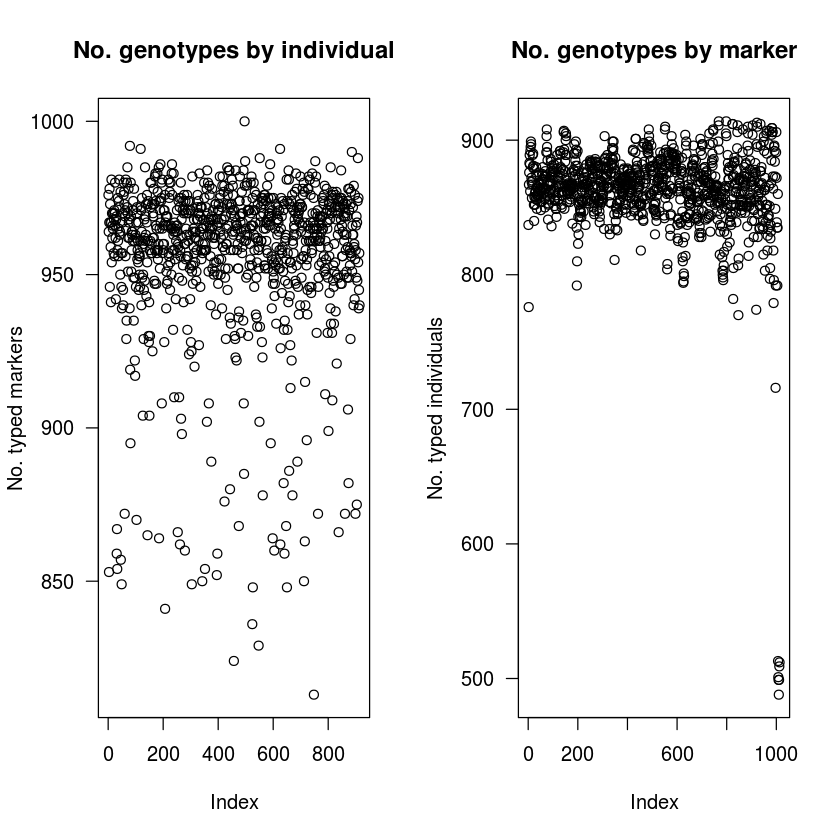

In [63]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [64]:
summary(datf2.2)

    F2 intercross

    No. individuals:    914 

    No. phenotypes:     7 
    Percent phenotyped: 100 94.2 94.2 100 100 100 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 

    Total markers:      1013 
    No. markers:        198 150 111 92 82 60 37 37 31 25 21 21 20 20 17 14 13 12 
                        11 11 8 8 7 7 
    Percent genotyped:  94.4 
    Genotypes (%):      AA:24.9  AB:48.8  BB:26.3  not BB:0.0  not AA:0.0 

In [65]:
cg <- comparegeno(datf2.2)

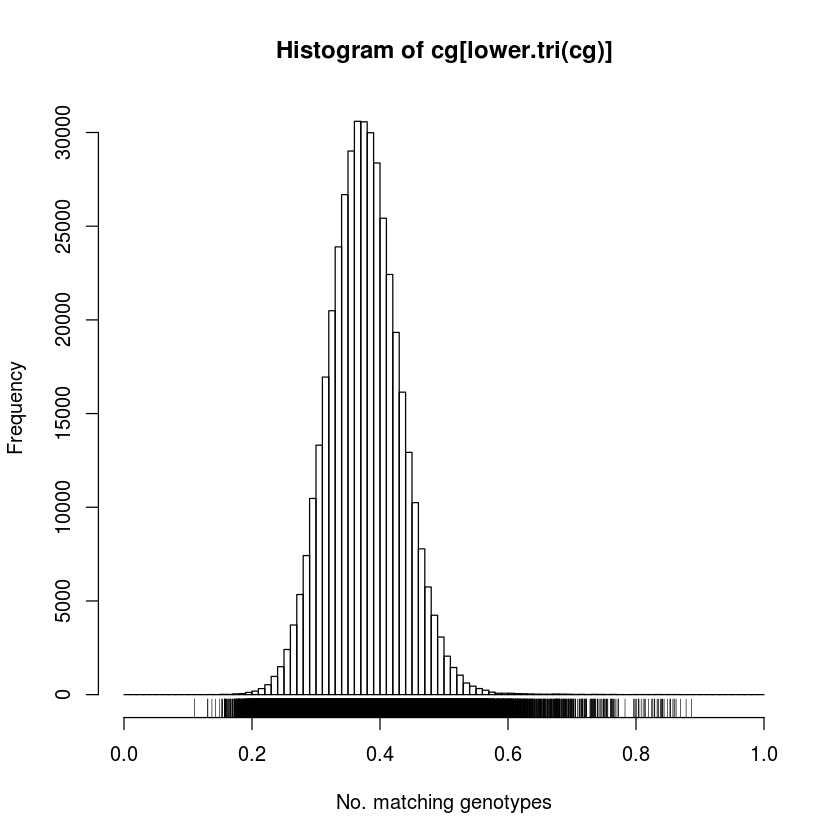

In [66]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [67]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [68]:
wh

row,col


In [69]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`4-20`
[1] "4-19"

$`4-56`
[1] "4-57"

$`7-8`
[1] "7-9"

$`8-15`
[1] "8-16"

$`13-4`
[1] "13-3"



In [70]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
"Sex column should be coded as 0=female 1=male; sex ignored."

In [71]:
gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
1-159,1,53,153,479,229,0,0,5.170848e-06
1-160,1,53,152,486,223,0,0,2.238125e-06
1-161,1,54,152,485,223,0,0,2.506780e-06
1-162,1,46,156,490,222,0,0,4.812761e-06
1-163,1,47,157,483,227,0,0,1.232450e-05
1-164,1,48,158,482,226,0,0,1.874607e-05
1-182,1,49,177,417,271,0,0,2.100983e-05
1-183,1,36,179,418,281,0,0,2.615085e-06
2-8,2,42,160,450,262,0,0,4.198707e-06
2-9,2,60,154,434,266,0,0,3.724069e-07


In [72]:
length(todrop)

[1] 118

In [73]:
datf2.3 <- datf2.2

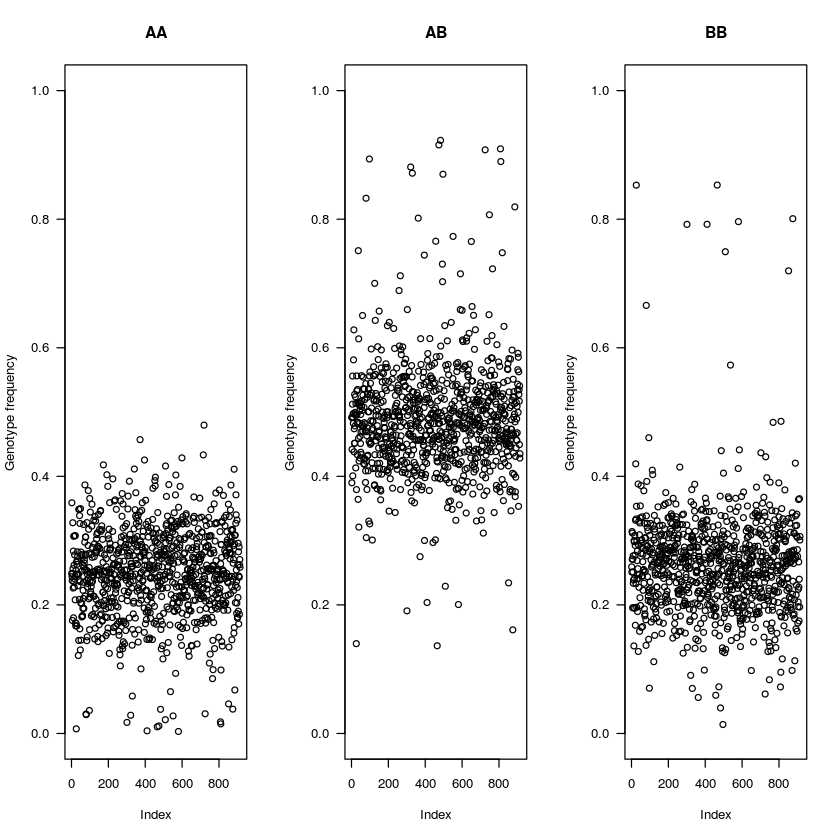

In [74]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

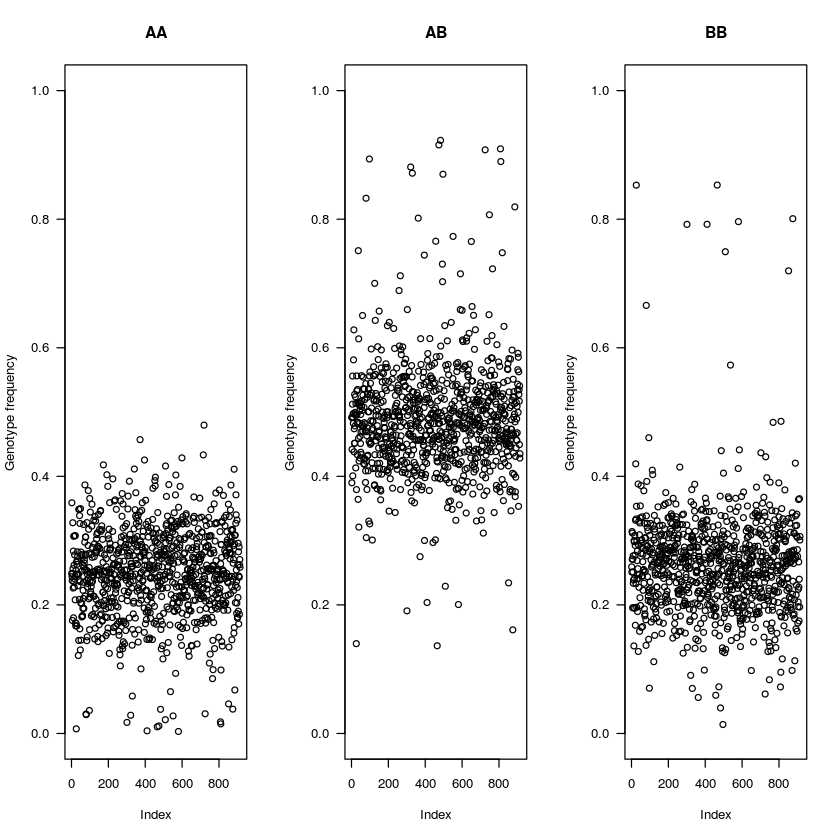

In [75]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [76]:
id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [77]:
datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [78]:
datf2.4 <- datf2.3

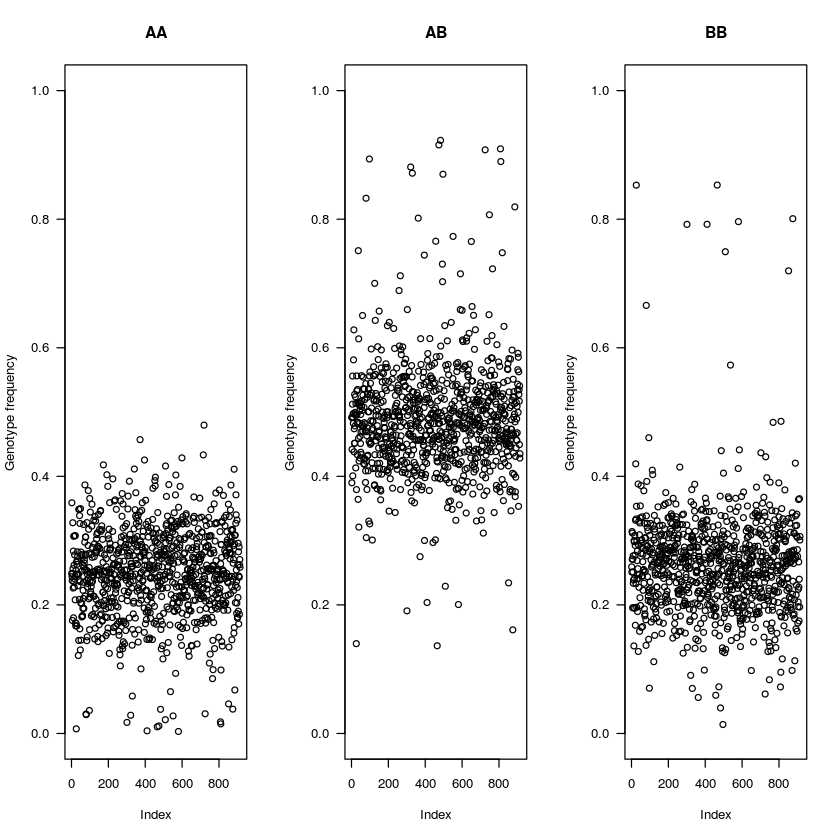

In [79]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [80]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

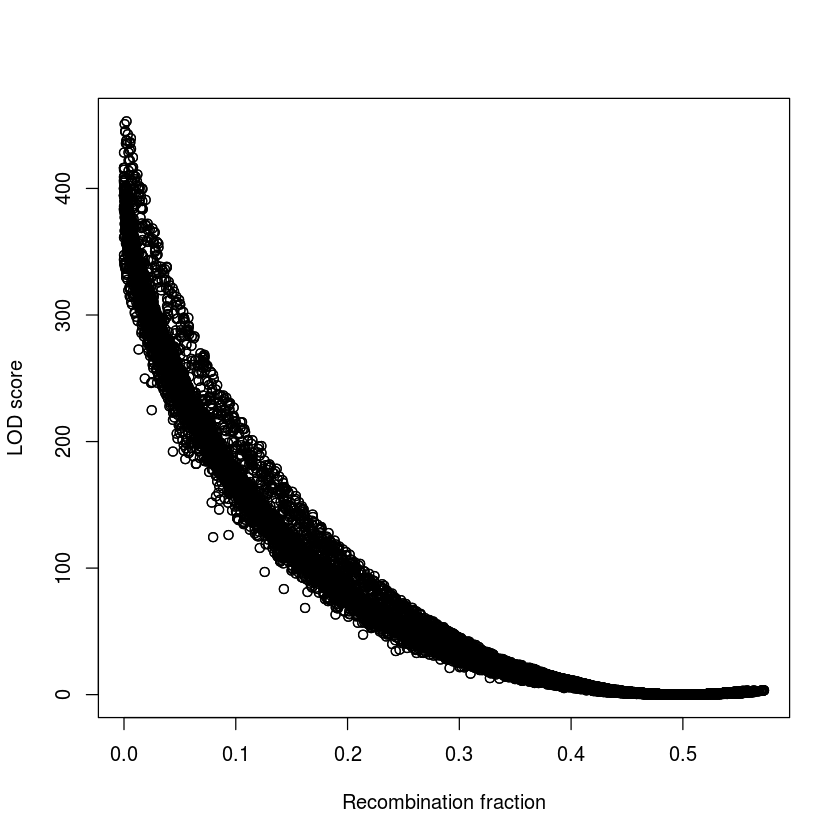

In [30]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

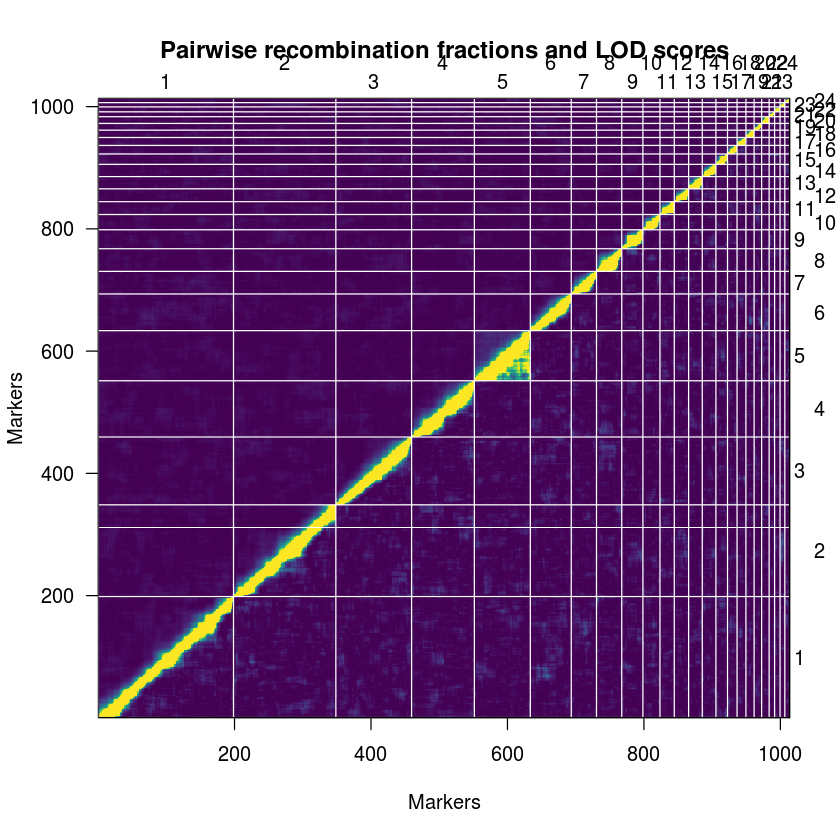

In [81]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [ ]:
genmap <- est.map(datf2.4, error.prob=0.005)

In [ ]:
summaryMap(genmap)

In [ ]:
plotMap(genmap)

In [ ]:
datf2.4 <- replace.map(datf2.4, genmap)

In [ ]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [82]:
datf2.5 <- datf2.4

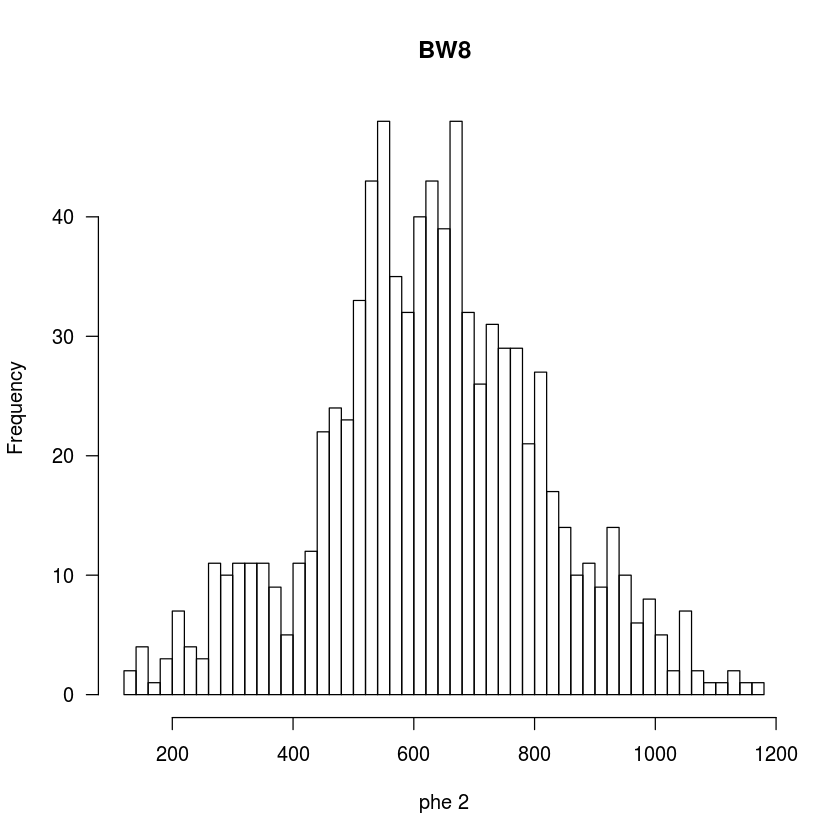

In [84]:
plotPheno(datf2.5, pheno.col =2 )

In [34]:
#plotMissing(datf2.5, reorder=TRUE)

In [85]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [86]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [87]:
out.em <- scanone(datf2.5, pheno.col = 2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"Dropping 53 individuals with missing phenotypes.
"

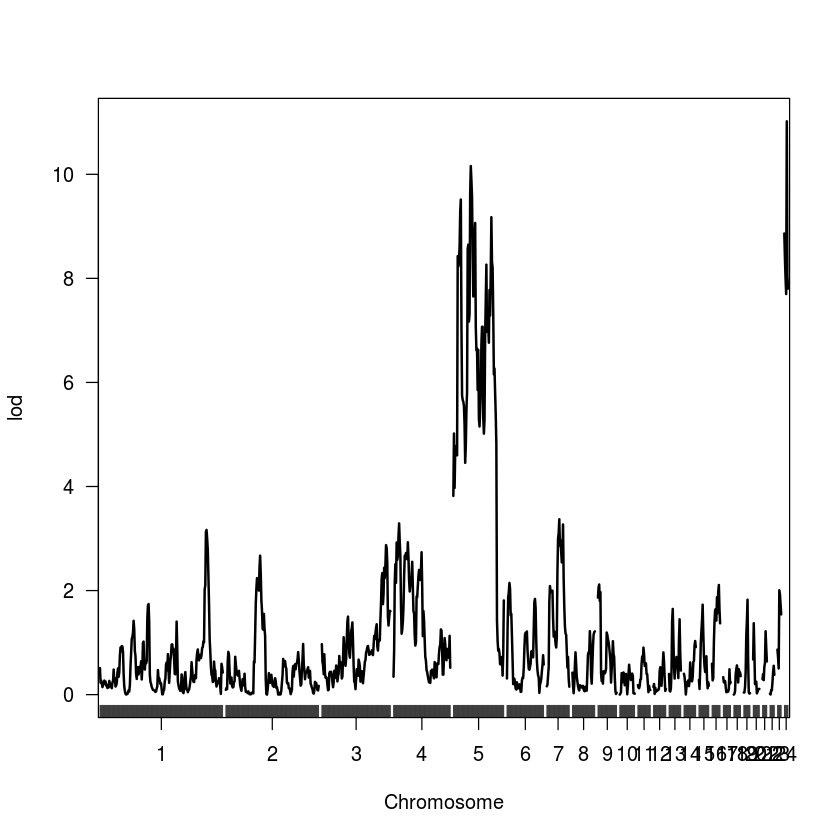

In [88]:
plot(out.em)

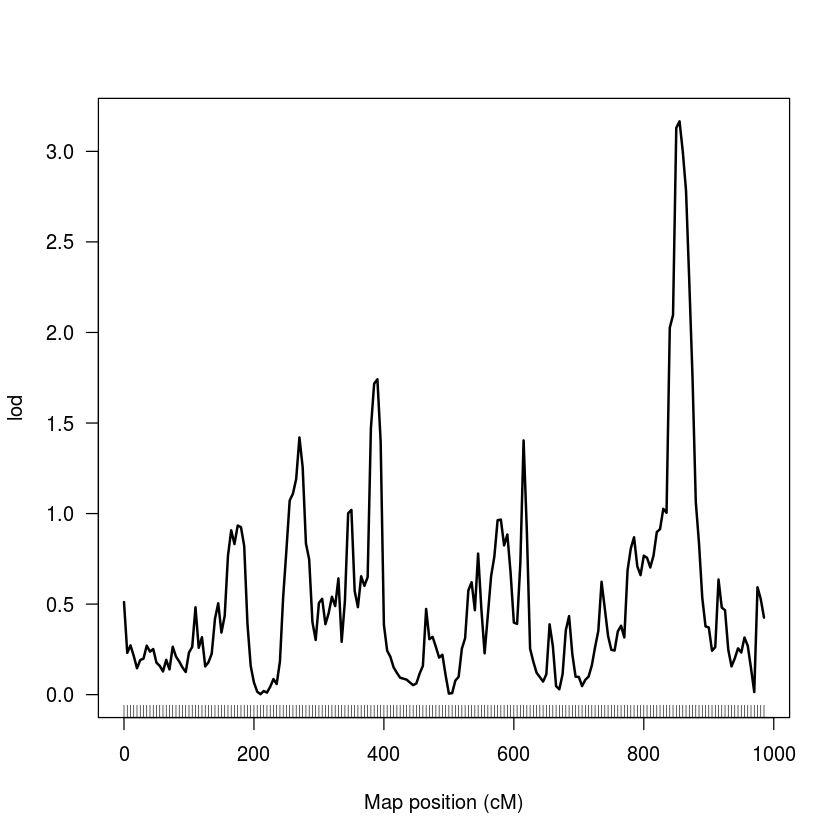

In [90]:
plot(out.em,chr=1)

In [91]:
ac <- pull.pheno(datf2.5, c("SEX"))

In [94]:
ac2 <- pull.pheno(datf2.5, c("SEX","DAM","SIRE"))

In [95]:
out.acovar <- scanone(datf2.5, pheno.col = 2, addcovar=ac2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"Dropping 53 individuals with missing phenotypes.
"

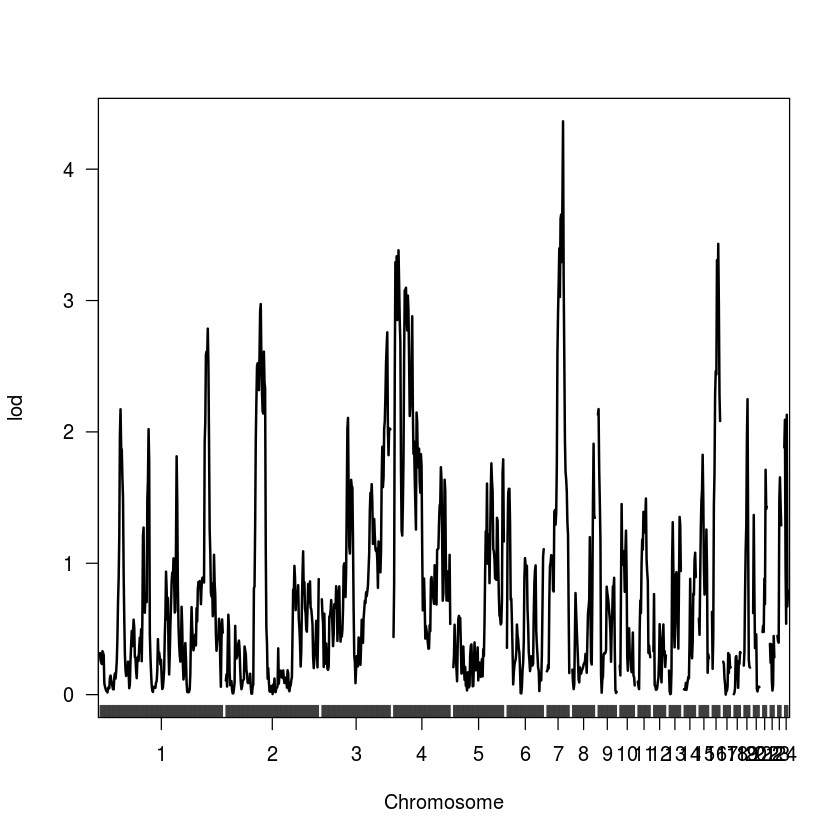

In [99]:
plot(out.acovar, )

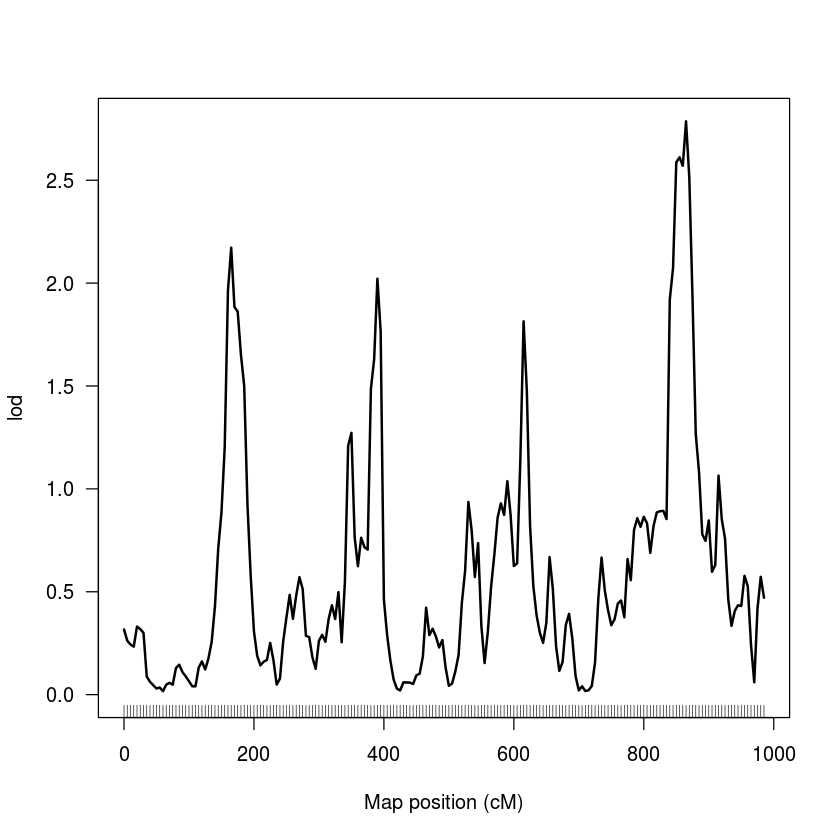

In [98]:
plot(out.acovar, chr=1)

In [ ]:
out.acovar

In [100]:
write.csv(out.acovar, "20190828_out_f2_bw8_ctrlsex.csv")